In [102]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [103]:
df1 = pd.read_csv("Datasets\options_prices.csv")
df = pd.read_csv("Datasets\stock_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\adrie\AppData\Local\Temp\ipykernel_26124\1236474256.py:1: SyntaxWarning: invalid escape sequence '\o'
  df1 = pd.read_csv("Datasets\options_prices.csv")
C:\Users\adrie\AppData\Local\Temp\ipykernel_26124\1236474256.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("Datasets\stock_dataset.csv")


In [104]:
dt = 1/252
r = 0.03

def estimate_parameters(df,t,T):
    # predict the price of an option based on information at time T
    df2 = df.iloc[t:T+1].copy()
    df2["log_St"] = np.log(df2['stock_price'])
    df2["D_log_St"] = df2["log_St"] - df2["log_St"].shift(1)

    sigma = np.sqrt(np.var(df2["D_log_St"][1:])/dt)
    mu = (sigma**2 / 2) + np.mean(df2["D_log_St"][1:])/dt 

    return(mu,sigma)

def compute_BS_price(K,T,t):
    mu, sigma = estimate_parameters(df,t,T)
    S0 = df.iloc[t]['stock_price']
    Dt = (T-1-t)/252
    d1 = (np.log(S0/K)+(r+sigma**2/2)*Dt)/(sigma*np.sqrt(Dt))
    d2 = d1 -sigma*np.sqrt(Dt)
    return(S0*norm.cdf(d1)-K*np.exp(-r*Dt)*norm.cdf(d2))

print(compute_BS_price(110,50,0))





0.9273518577514679


In [105]:
df1.head()

,date_created,strike,maturity,time_to_maturity,option_price
0,2025-01-01,80.0,2025-01-31,0.119048,20.209504
1,2025-01-01,80.0,2025-03-02,0.238095,20.833241
2,2025-01-01,80.0,2025-05-01,0.476190,21.206518
3,2025-01-01,85.0,2025-01-31,0.119048,15.073619
4,2025-01-01,85.0,2025-03-02,0.238095,15.749451


In [106]:

def market_day_number(date_str):
    return np.busday_count(f"{date_str[:4]}-01-01", date_str) + 1

df1['date_created_nb'] = df1['date_created'].apply(market_day_number)
df1['maturity_nb'] = df1['maturity'].apply(market_day_number)

In [107]:
def add_BS_price_df(row):
    K = row['strike']
    T = row['date_created_nb']
    t = 0
    row['estimated_price'] = compute_BS_price(K,T,t) 
    return(row)

df_pred = df1[df1['date_created_nb']>20].copy()
df_pred = df_pred.apply(add_BS_price_df, axis = 1)


In [113]:
df_pred['relative_error'] = abs(100*(df_pred['estimated_price'] - df_pred['option_price'])/df_pred['option_price'])

In [116]:
df_pred[100:150]

,date_created,strike,maturity,time_to_maturity,option_price,date_created_nb,maturity_nb,estimated_price,relative_error
640,2025-02-03,110.0,2025-04-04,0.238095,0.387310,24,68,0.340127,12.182097
641,2025-02-03,110.0,2025-06-03,0.476190,1.207984,24,110,0.340127,71.843380
642,2025-02-03,115.0,2025-03-05,0.119048,0.008325,24,46,0.079364,853.298376
643,2025-02-03,115.0,2025-04-04,0.238095,0.114974,24,68,0.079364,30.971603
644,2025-02-03,115.0,2025-06-03,0.476190,0.641000,24,110,0.079364,87.618670
645,2025-02-03,120.0,2025-03-05,0.119048,0.000250,24,46,0.014649,5764.735512
646,2025-02-03,120.0,2025-04-04,0.238095,0.024713,24,68,0.014649,40.723155
647,2025-02-03,120.0,2025-06-03,0.476190,0.394284,24,110,0.014649,96.284615
648,2025-02-04,80.0,2025-03-06,0.119048,20.172559,25,47,20.229764,0.283578
649,2025-02-04,80.0,2025-04-05,0.238095,20.457517,25,69,20.229764,1.113295


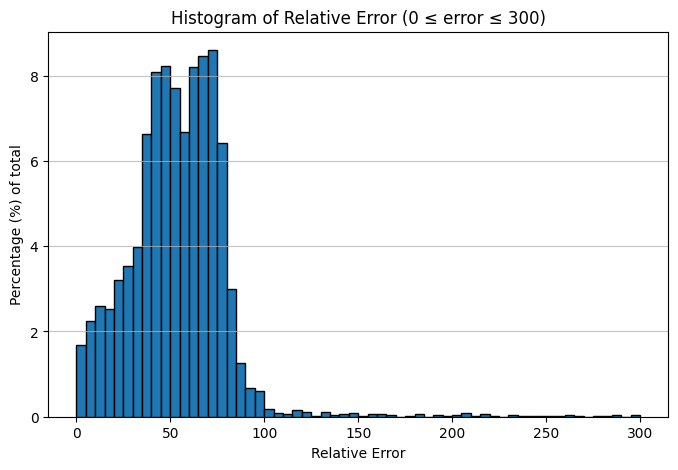

In [115]:
import matplotlib.pyplot as plt


errors = df_pred['relative_error']
errors_clean = errors[np.isfinite(errors)]
errors_filtered = errors_clean[(errors_clean >= 0) & (errors_clean <= 300)]


total_count = len(errors_clean)

bins = np.arange(0, 305, 5)

plt.figure(figsize=(8,5))
plt.hist(errors_filtered, bins=bins, weights=np.ones_like(errors_filtered) / total_count * 100,
         edgecolor='black')

plt.xlabel('Relative Error')
plt.ylabel('Percentage (%) of total')
plt.title('Histogram of Relative Error (0 ≤ error ≤ 300)')
plt.grid(axis='y', alpha=0.75)
plt.show()